<a href="https://colab.research.google.com/github/WahyuKhairi06/JaringanSyarafTiruan_WahyuKhairi_2311531009/blob/main/Tugas_Pertemuan_7_JST_Wahyu_Khairi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **JARINGAN SYARAF TIRUAN**

**IMPORT LIBRARY**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

**1. Load Dataset**

In [11]:
df = pd.read_csv("https://raw.githubusercontent.com/WahyuKhairi06/JaringanSyarafTiruan_WahyuKhairi_2311531009/refs/heads/main/ObesityDataSet.csv")
print("Jumlah Data:", df.shape)
print("\ninfo Dataset:\n", df.info)


Jumlah Data: (2111, 17)

info Dataset:
 <bound method DataFrame.info of       Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641   

**2. Cek data kosong**

In [10]:
df.isnull().sum()


,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


**3. Type data**

In [12]:
df.dtypes


,0
Gender,object
Age,float64
Height,float64
Weight,float64
family_history_with_overweight,object
FAVC,object
FCVC,float64
NCP,float64
CAEC,object
SMOKE,object


**4. Pisahkan Fitur dan target**

In [13]:
X = df.drop(columns=["NObeyesdad"])
y = df["NObeyesdad"]

**5. Encode Fitur Kategorikal**

In [14]:
X = pd.get_dummies(X, drop_first=True)

**6. Encode Label**

In [15]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)
label_names = le.classes_
print("\nLabel Classes:", label_names)


Label Classes: ['Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II']


**7. Normalisasi Fitur**

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**8. Split Train test**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
print("\nData Train:", X_train.shape, "Data Test:", X_test.shape)


Data Train: (1688, 23) Data Test: (423, 23)


**9. Buat Model Neural Network**

In [19]:
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(len(label_names), activation='softmax')])


**10. Kompilasi model nya**

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**11. Coba pelatihan model yang telah dibuat**

In [21]:
early_stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_split=0.15,
                    epochs=100, batch_size=32, callbacks=[early_stop], verbose=1)


Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2529 - loss: 1.8507 - val_accuracy: 0.4252 - val_loss: 1.5256
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5394 - loss: 1.3748 - val_accuracy: 0.5866 - val_loss: 1.2447
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6517 - loss: 1.0708 - val_accuracy: 0.6220 - val_loss: 1.0425
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6741 - loss: 0.9198 - val_accuracy: 0.6811 - val_loss: 0.9113
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7442 - loss: 0.7596 - val_accuracy: 0.7283 - val_loss: 0.8025
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7631 - loss: 0.6874 - val_accuracy: 0.7677 - val_loss: 0.7235
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8149 - loss: 0.6017 - val_accuracy: 0.7874 - val_loss: 0.6695
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8319 - loss: 0.5209 - val_accuracy: 0.7874 - v

**11. Plot akurasi dan loss**

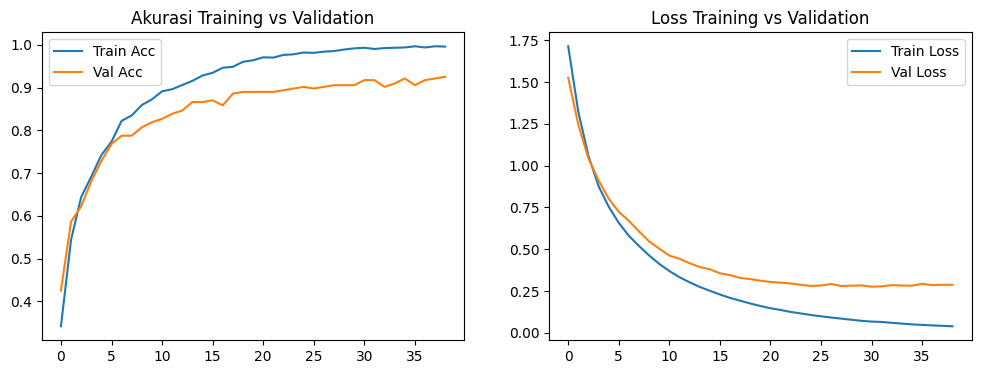

In [22]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title("Akurasi Training vs Validation")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title("Loss Training vs Validation")
plt.show()

**12. Evaluasi Model**

In [23]:
y_pred = np.argmax(model.predict(X_test), axis=1)
acc = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print(f"\nAkurasi: {acc:.4f}")
print(f"F1-Score (Macro): {f1_macro:.4f}")
print(f"F1-Score (Weighted): {f1_weighted:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_names))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

Akurasi: 0.9220
F1-Score (Macro): 0.9192
F1-Score (Weighted): 0.9217

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.91      0.96      0.94        54
      Normal_Weight       0.82      0.81      0.82        58
     Obesity_Type_I       0.93      0.99      0.96        70
    Obesity_Type_II       1.00      0.95      0.97        60
   Obesity_Type_III       1.00      1.00      1.00        65
 Overweight_Level_I       0.84      0.83      0.83        58
Overweight_Level_II       0.93      0.90      0.91        58

           accuracy                           0.92       423
          macro avg       0.92      0.92      0.92       423
       weighted avg       0.92      0.92      0.92       423



**13. confusion Matrix**

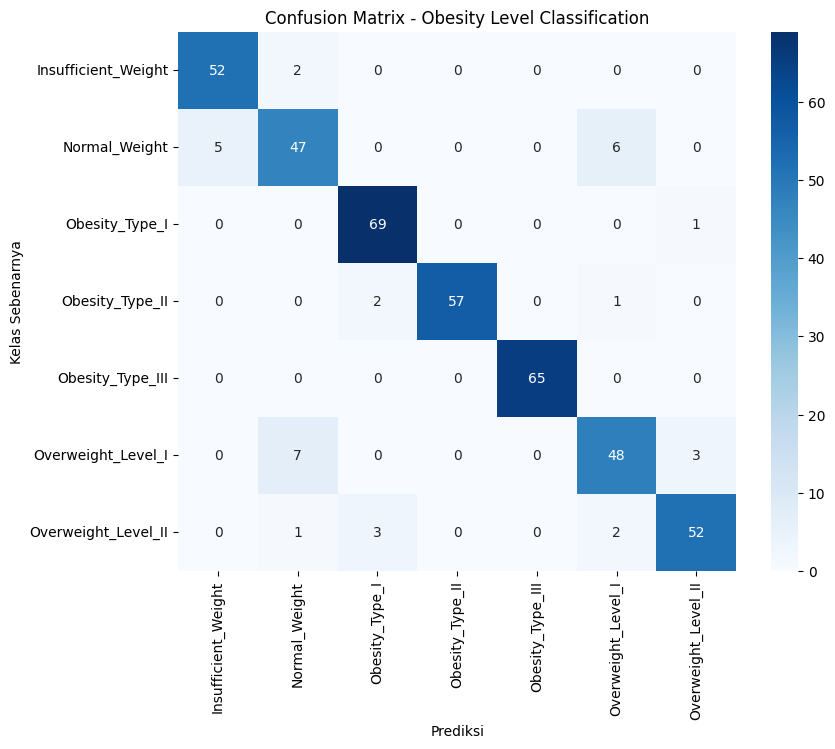

In [24]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Prediksi")
plt.ylabel("Kelas Sebenarnya")
plt.title("Confusion Matrix - Obesity Level Classification")
plt.show()